In [830]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [831]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [832]:
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Pregnancies
- Values range from 0 to 17  
- Most women had 0–6 pregnancies  
- Zero value is valid (women with no pregnancies)

---

## Glucose
- Values range from 0 to 199  
- Normal fasting glucose should be around 70–100  
- Zero values indicate missing measurements  

---

## Blood Pressure
- Values range from 0 to 122  
- Blood pressure values are mostly in a healthy range  
- Zero values indicate missing df  

---

## Skin Thickness
- Values range from 0 to 99  
- Many values are recorded as zero, indicating missing df  
- Related to body fat measurement  

---

## Insulin
- Values range from 0 to 846  
- Many zero values indicate missing insulin measurements  
- Presence of extreme high values (outliers)  

---

## BMI
- Values range from 0 to 67.1  
- Most patients fall in overweight or obese category  
- Zero values indicate missing BMI df  

---

## Diabetes Pedigree Function
- Values range from 0.078 to 2.42  
- Indicates genetic influence on diabetes  
- Higher values indicate higher hereditary risk  

---

## Age
- Values range from 21 to 81  
- Majority of patients are young to middle-aged  
- Diabetes occurrence increases with age  

---

## Outcome
- Values range from 0 to 1  
- 0 indicates non-diabetic, 1 indicates diabetic  
- dfset is slightly imbalanced  


In [833]:
df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [834]:
cols_with_zeros=["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
df[cols_with_zeros]=df[cols_with_zeros].replace(0,np.nan)
df = df.fillna(df.median())
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0    125.0  33.6   
1              1     85.0           66.0           29.0    125.0  26.6   
2              8    183.0           64.0           29.0    125.0  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0    125.0  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0           29.0    125.0  30.1   
767            1     93.0           70.0           31.0    125.0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

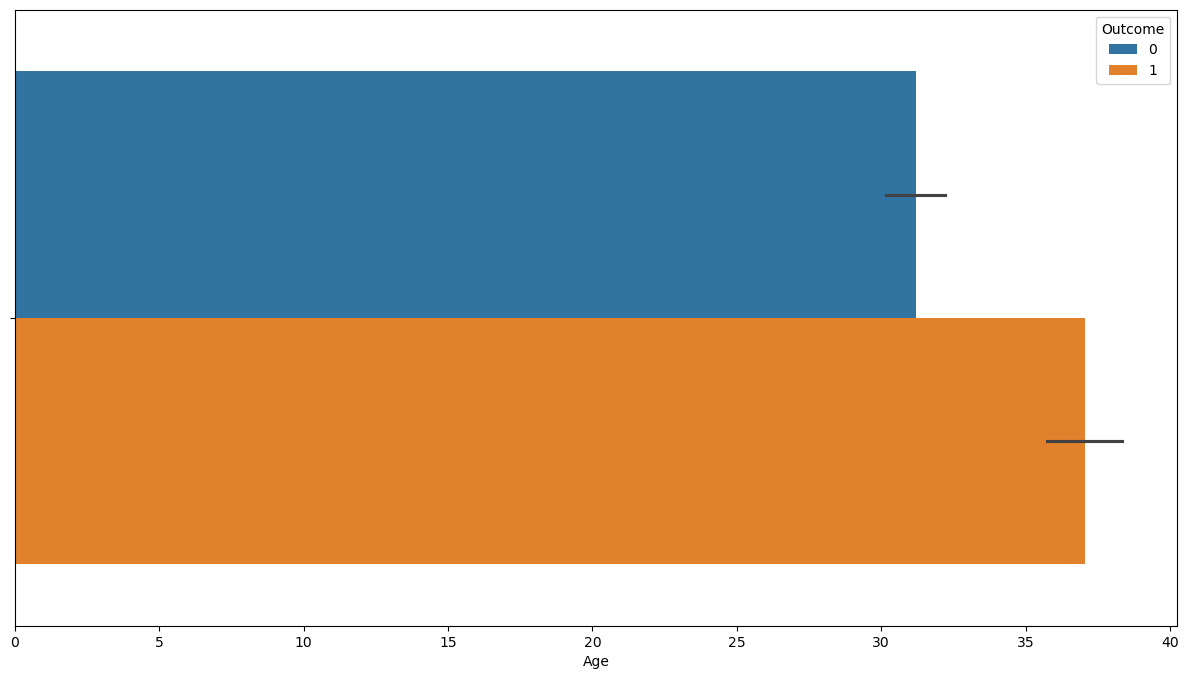

In [835]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
sns.barplot(x=df["Age"],hue=df["Outcome"])
plt.show()

In [836]:
df['Age'].groupby(df['Outcome']).mean()

Outcome
0    31.190000
1    37.067164
Name: Age, dtype: float64

In [837]:
df['Age'].groupby(df['Outcome']).std()

Outcome
0    11.667655
1    10.968254
Name: Age, dtype: float64

<Axes: xlabel='Age'>

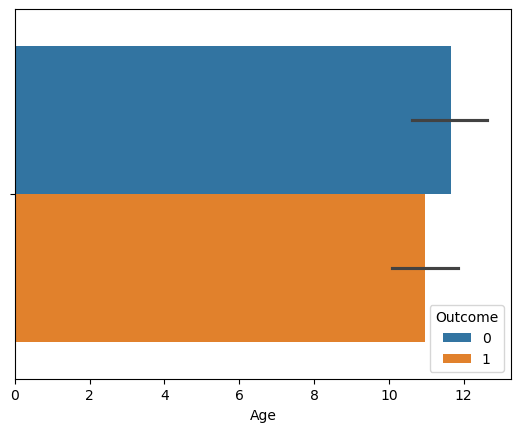

In [838]:
sns.barplot(x=df["Age"],hue=df["Outcome"],estimator="std")

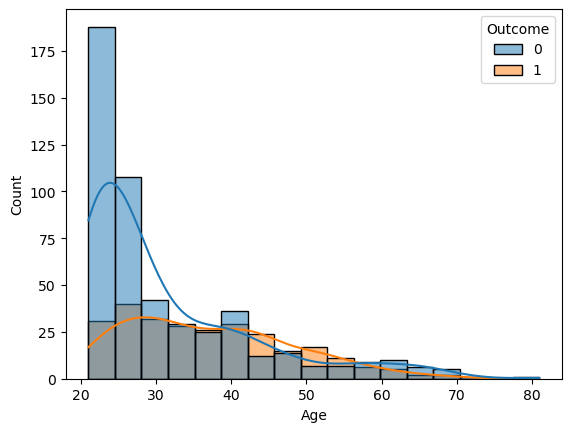

In [839]:
import seaborn as sns
sns.histplot(x='Age',hue='Outcome',data=df,kde=True)
plt.show()

In [840]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<Axes: xlabel='BMI'>

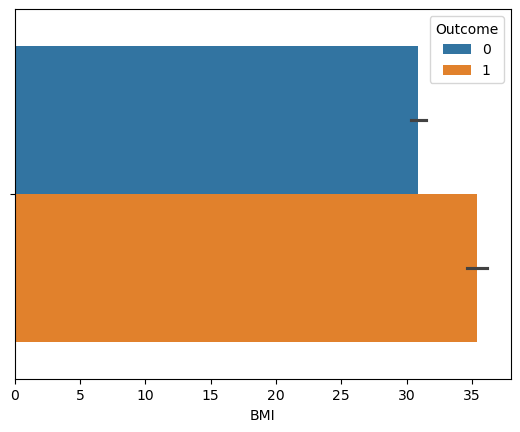

In [841]:
sns.barplot(x=df["BMI"],hue=df["Outcome"])

<Axes: xlabel='BMI'>

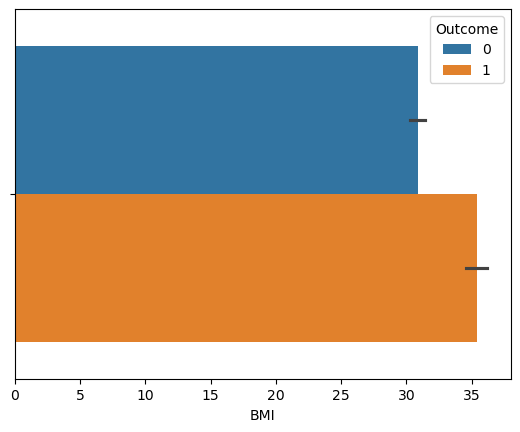

In [842]:
sns.barplot(x=df["BMI"],hue=df["Outcome"],estimator="mean")

In [843]:
df['BMI'].groupby(df['Outcome']).mean()

Outcome
0    30.885600
1    35.383582
Name: BMI, dtype: float64

In [844]:
df['BMI'].groupby(df['Outcome']).std()

Outcome
0    6.504128
1    6.595603
Name: BMI, dtype: float64

<Axes: xlabel='BMI'>

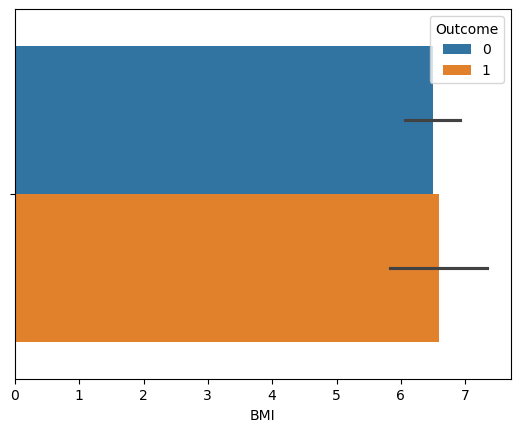

In [845]:
sns.barplot(x=df["BMI"],hue=df["Outcome"],estimator="std")

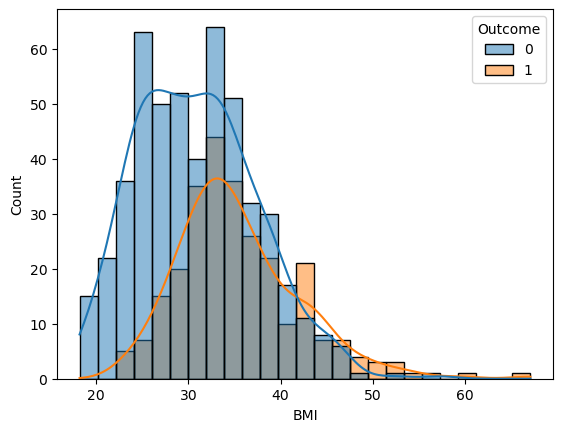

In [846]:
import seaborn as sns
sns.histplot(x='BMI',hue='Outcome',data=df,kde=True)
plt.show()

In [847]:
die_age=df['Age'][df['Outcome']==1]
nondie_age=df['Age'][df['Outcome']==0]

In [848]:
# H0 : Both df are same
# H1 : Both are not same
# Performing T-test
from scipy.stats import ttest_ind

stat, p = ttest_ind(die_age, nondie_age)

alpha = 0.05
if p<alpha:
    print('Reject H0')
else:
    print('Accept H0')

Reject H0


In [849]:
die_bmi=df['BMI'][df['Outcome']==1]
nondie_bmi=df['BMI'][df['Outcome']==0]

In [850]:
# H0 : Both df are same
# H1 : Both are not same
# Performing T-test
from scipy.stats import ttest_ind

stat, p = ttest_ind(die_bmi, nondie_bmi)

alpha = 0.05
if p<alpha:
    print('Reject H0')
else:
    print('Accept H0')

Reject H0


In [851]:
df['BloodPressure'].groupby(df['Outcome']).mean()

Outcome
0    70.920000
1    75.123134
Name: BloodPressure, dtype: float64

In [852]:
df['BloodPressure'].groupby(df['Outcome']).std()

Outcome
0    11.929385
1    11.951672
Name: BloodPressure, dtype: float64

In [853]:
die_bp=df['BloodPressure'][df['Outcome']==1]
nondie_bp=df['BloodPressure'][df['Outcome']==0]

In [854]:
# H0 : Both df are same
# H1 : Both are not same
# Performing T-test
from scipy.stats import ttest_ind

stat, p = ttest_ind(die_bp, nondie_bp)

alpha = 0.05
if p<alpha:
    print('Reject H0')
else:
    print('Accept H0')

Reject H0


<Axes: xlabel='Insulin'>

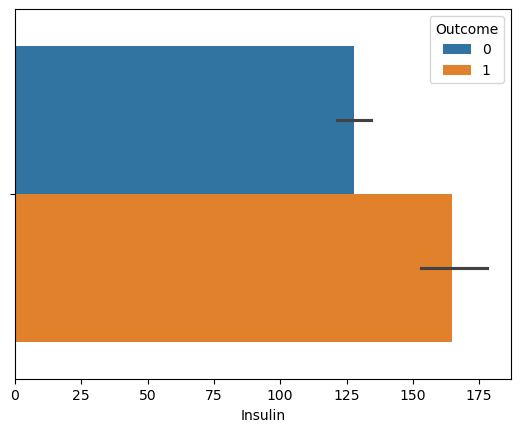

In [855]:
sns.barplot(x=df["Insulin"],hue=df["Outcome"])

In [856]:
df['Insulin'].groupby(df['Outcome']).mean()

Outcome
0    127.792000
1    164.701493
Name: Insulin, dtype: float64

In [857]:
df['Insulin'].groupby(df['Outcome']).std()

Outcome
0     74.447469
1    100.932249
Name: Insulin, dtype: float64

<Axes: xlabel='Insulin'>

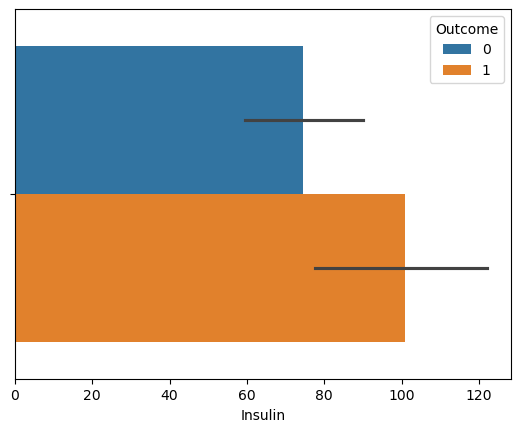

In [858]:
sns.barplot(x=df["Insulin"],hue=df["Outcome"],estimator="std")

<Axes: xlabel='Insulin', ylabel='Count'>

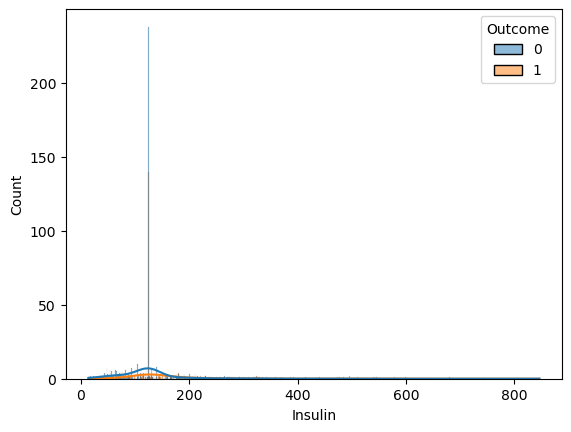

In [859]:
sns.histplot(x='Insulin',hue='Outcome',data=df,kde=True)

In [860]:
die_ins=df['Insulin'][df['Outcome']==1]
nondie_ins=df['Insulin'][df['Outcome']==0]

In [861]:
# H0 : Both df are same
# H1 : Both are not same
# Performing T-test
from scipy.stats import ttest_ind

stat, p = ttest_ind(die_ins, nondie_ins)

alpha = 0.05
if p<alpha:
    print('Reject H0')
else:
    print('Accept H0')

Reject H0


<Axes: xlabel='DiabetesPedigreeFunction'>

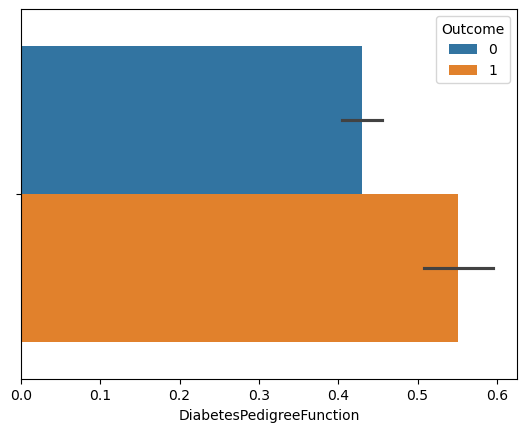

In [862]:
sns.barplot(x=df["DiabetesPedigreeFunction"],hue=df["Outcome"])

In [863]:
df['DiabetesPedigreeFunction'].groupby(df['Outcome']).mean()

Outcome
0    0.429734
1    0.550500
Name: DiabetesPedigreeFunction, dtype: float64

In [864]:
df['DiabetesPedigreeFunction'].groupby(df['Outcome']).std()

Outcome
0    0.299085
1    0.372354
Name: DiabetesPedigreeFunction, dtype: float64

<Axes: xlabel='DiabetesPedigreeFunction'>

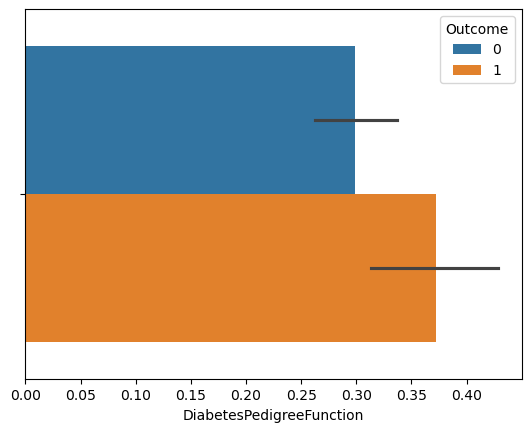

In [865]:
sns.barplot(x=df["DiabetesPedigreeFunction"],hue=df["Outcome"],estimator="std")

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Count'>

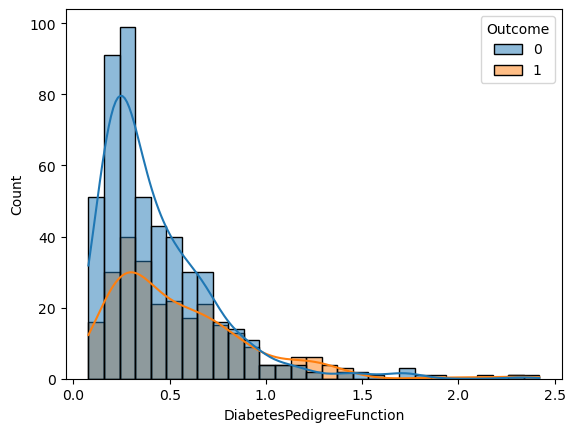

In [866]:
sns.histplot(x='DiabetesPedigreeFunction',hue='Outcome',data=df,kde=True)

In [867]:
die_dpf=df['DiabetesPedigreeFunction'][df['Outcome']==1]
nondie_dpf=df['DiabetesPedigreeFunction'][df['Outcome']==0]

In [868]:
# H0 : Both df are same
# H1 : Both are not same
# Performing T-test
from scipy.stats import ttest_ind

stat, p = ttest_ind(die_dpf, nondie_dpf)

alpha = 0.05
if p<alpha:
    print('Reject H0')
else:
    print('Accept H0')

Reject H0


<Axes: xlabel='Glucose'>

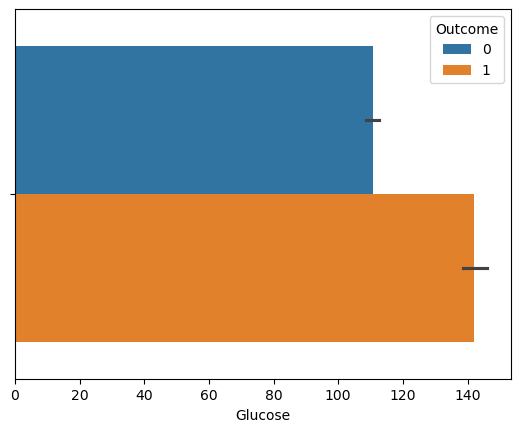

In [869]:
sns.barplot(x=df["Glucose"],hue=df["Outcome"])

In [870]:
df['Glucose'].groupby(df['Outcome']).mean()

Outcome
0    110.682000
1    142.130597
Name: Glucose, dtype: float64

In [871]:
df['Glucose'].groupby(df['Outcome']).std()

Outcome
0    24.707201
1    29.568839
Name: Glucose, dtype: float64

<Axes: xlabel='Glucose'>

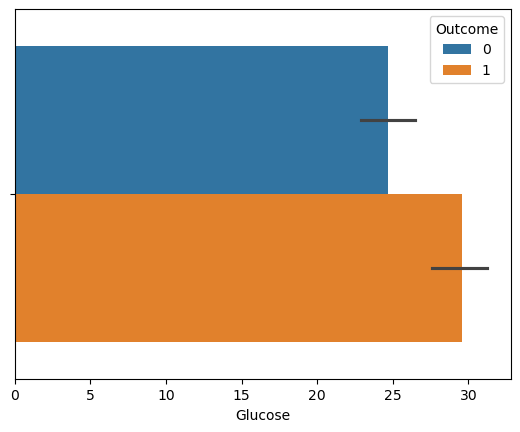

In [872]:
sns.barplot(x=df["Glucose"],hue=df["Outcome"],estimator="std")

<Axes: xlabel='Glucose', ylabel='Count'>

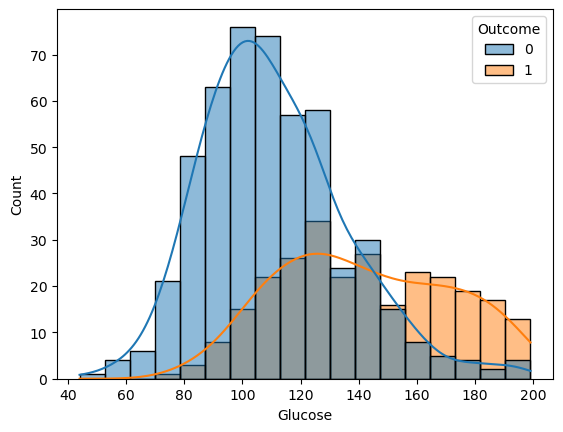

In [873]:
sns.histplot(x='Glucose',hue='Outcome',data=df,kde=True)

In [874]:
die_g=df['Glucose'][df['Outcome']==1]
nondie_g=df['Glucose'][df['Outcome']==0]

In [875]:
# H0 : Both df are same
# H1 : Both are not same
# Performing T-test
from scipy.stats import ttest_ind

stat, p = ttest_ind(die_g, nondie_g)

alpha = 0.05
if p<alpha:
    print('Reject H0')
else:
    print('Accept H0')

Reject H0


<Axes: ylabel='Glucose'>

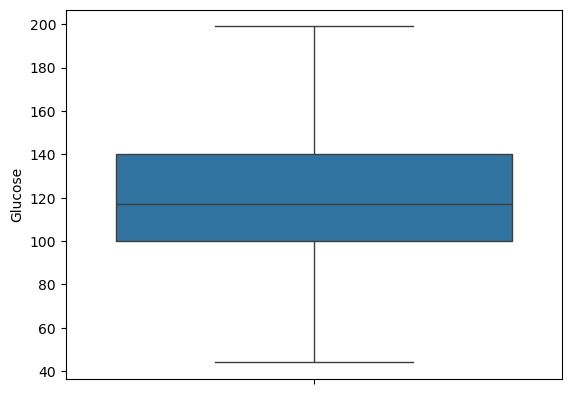

In [876]:
import seaborn as sns
sns.boxplot(df['Glucose'])

<Axes: ylabel='BloodPressure'>

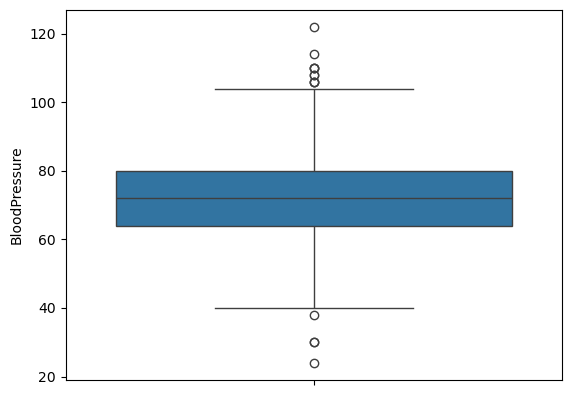

In [877]:
sns.boxplot(df['BloodPressure'])

<Axes: ylabel='SkinThickness'>

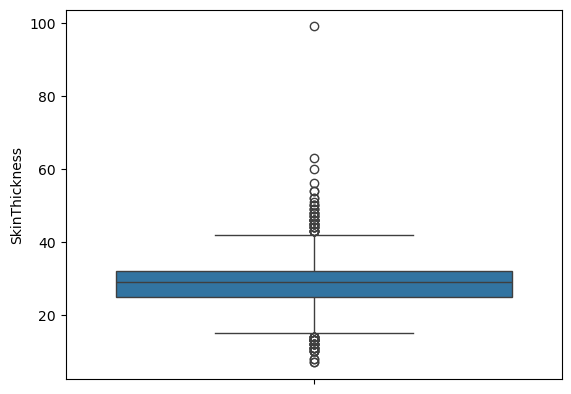

In [878]:
sns.boxplot(df['SkinThickness'])

<Axes: ylabel='Insulin'>

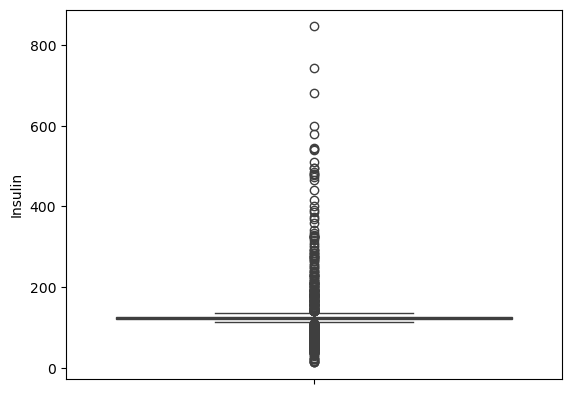

In [879]:
sns.boxplot(df['Insulin'])

<Axes: ylabel='BMI'>

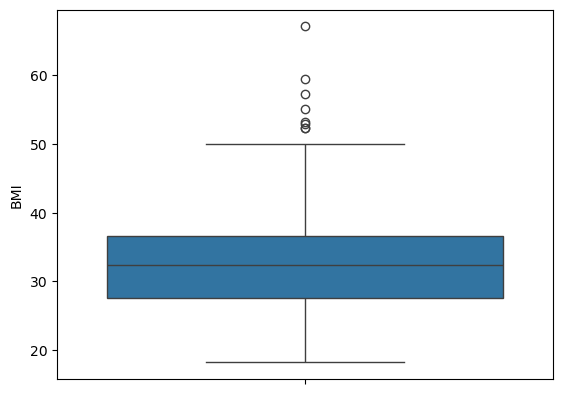

In [880]:
sns.boxplot(df['BMI'])

<Axes: ylabel='Age'>

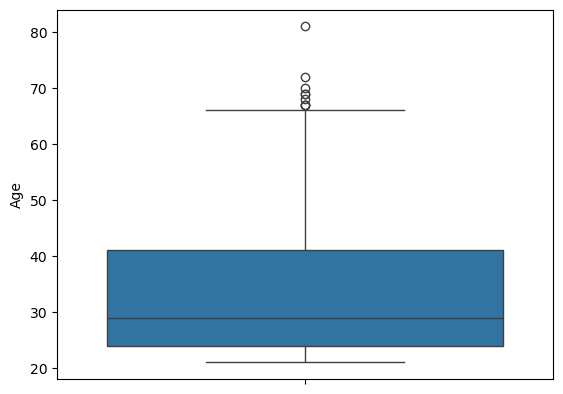

In [881]:
sns.boxplot(df['Age'])

In [882]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1
outliers=(df<(q1-1.5*iqr))|(df>(q3+1.5*iqr))
outliers_percentage=(outliers.sum()/len(df))*100
print(outliers_percentage)


Pregnancies                  0.520833
Glucose                      0.000000
BloodPressure                1.822917
SkinThickness               11.328125
Insulin                     45.052083
BMI                          1.041667
DiabetesPedigreeFunction     3.776042
Age                          1.171875
Outcome                      0.000000
dtype: float64


In [883]:
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']

for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df[col] = df[col].clip(Q1 - 1.5*IQR, Q3 + 1.5*IQR)

In [884]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1
outliers=(df<(q1-1.5*iqr))|(df>(q3+1.5*iqr))
outliers_percentage=(outliers.sum()/len(df))*100
print(outliers_percentage)


Pregnancies                 0.520833
Glucose                     0.000000
BloodPressure               0.000000
SkinThickness               0.000000
Insulin                     0.000000
BMI                         0.000000
DiabetesPedigreeFunction    3.776042
Age                         0.000000
Outcome                     0.000000
dtype: float64


In [885]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
scaler = MinMaxScaler()
X = df.drop(columns = ['Outcome'])
y = df['Outcome']
X_scaled=scaler.fit_transform(X)

In [886]:

X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [887]:

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [888]:
from sklearn.metrics import accuracy_score

In [889]:
y_pred_train = model.predict(X_train)
accuracy_score(y_train, y_pred_train)

0.7654723127035831

In [890]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7272727272727273

In [891]:
from sklearn.metrics import confusion_matrix

In [892]:
confusion_matrix(y_train, y_pred_train)

array([[350,  51],
       [ 93, 120]])

In [893]:
confusion_matrix(y_test, y_pred)

array([[78, 21],
       [21, 34]])

In [894]:
y_pred_prob = model.predict_proba(X_test)
y_pred_prob


array([[0.61140051, 0.38859949],
       [0.79603534, 0.20396466],
       [0.85932941, 0.14067059],
       [0.79198021, 0.20801979],
       [0.52433579, 0.47566421],
       [0.45082977, 0.54917023],
       [0.97881826, 0.02118174],
       [0.61875607, 0.38124393],
       [0.49476653, 0.50523347],
       [0.29840897, 0.70159103],
       [0.73447772, 0.26552228],
       [0.17291475, 0.82708525],
       [0.55260768, 0.44739232],
       [0.77690232, 0.22309768],
       [0.92640847, 0.07359153],
       [0.5559966 , 0.4440034 ],
       [0.83308071, 0.16691929],
       [0.91675578, 0.08324422],
       [0.3977291 , 0.6022709 ],
       [0.50375641, 0.49624359],
       [0.74760008, 0.25239992],
       [0.90861146, 0.09138854],
       [0.48150475, 0.51849525],
       [0.9068633 , 0.0931367 ],
       [0.51031153, 0.48968847],
       [0.20867332, 0.79132668],
       [0.85786345, 0.14213655],
       [0.96174044, 0.03825956],
       [0.72335336, 0.27664664],
       [0.89244932, 0.10755068],
       [0.

### Precision Score
- **TP (True Positives):** Correctly predicted positive cases  
- **FP (False Positives):** Incorrectly predicted positive cases  

**Precision:** Accuracy of positive predictions  
 Precision = TP/(TP + FP)

---

### Recall Score
- **FN (False Negatives):** Actual positives predicted as negative  

**Recall (Sensitivity / True Positive Rate):** Fraction of actual positives correctly identified  
 Recall = TP/(TP+FN)

---

### F1 Score
- **F1 Score (F-Score / F-Measure):** Metric used to compare classifiers  
- Combines **Precision** and **Recall** using their harmonic mean  

 F1 = 2 x (precision x recall)/(precision + recall)

In [895]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [896]:
 precision_score(y_test,y_pred)

0.6181818181818182

In [897]:
recall_score(y_test,y_pred)

0.6181818181818182

In [898]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        99
           1       0.62      0.62      0.62        55

    accuracy                           0.73       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



In [899]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [900]:
X_test.shape

(154, 8)

In [901]:
model.predict(X_test)

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [902]:
# probability of 0 class(1st column) nd 1 class(2nd column)
y_prob=model.predict_proba(X_test)[:,1] # here we are taking the postive class that is second column onlly
y_prob


array([0.38859949, 0.20396466, 0.14067059, 0.20801979, 0.47566421,
       0.54917023, 0.02118174, 0.38124393, 0.50523347, 0.70159103,
       0.26552228, 0.82708525, 0.44739232, 0.22309768, 0.07359153,
       0.4440034 , 0.16691929, 0.08324422, 0.6022709 , 0.49624359,
       0.25239992, 0.09138854, 0.51849525, 0.0931367 , 0.48968847,
       0.79132668, 0.14213655, 0.03825956, 0.27664664, 0.10755068,
       0.73215201, 0.78350641, 0.79089753, 0.53815333, 0.56510813,
       0.6996818 , 0.90715352, 0.2621123 , 0.45217072, 0.4253859 ,
       0.06905314, 0.50927272, 0.50722143, 0.33672722, 0.06660514,
       0.58866772, 0.70366285, 0.23620149, 0.37517547, 0.93203425,
       0.06922562, 0.71875941, 0.86105904, 0.24628887, 0.15974337,
       0.05256846, 0.69188133, 0.08898835, 0.30187991, 0.64060264,
       0.64571273, 0.30246628, 0.36779789, 0.30579243, 0.12814039,
       0.5509162 , 0.06871179, 0.67105557, 0.0702168 , 0.80801887,
       0.75253711, 0.10046702, 0.2376243 , 0.11031534, 0.12953

### ROC – AUC
**ROC (Receiver Operating Characteristic) Curve** shows how well a model can distinguish between two classes  
(e.g., whether a patient has a disease or not).

- A **better model** clearly separates the two classes  
- A **poor model** struggles to distinguish between them  

**AUC (Area Under the Curve):**  
- Measures the overall ability of the model to discriminate between classes  
- Higher AUC → Better model performance


In [908]:
y_prob=model.predict_proba(X_test)[:,1]

In [909]:
#false postive rate ,true postive rate
fpr,tpr,thresholds=roc_curve(y_test,y_prob)

In [911]:
auc_score=roc_auc_score(y_test,y_prob)
print("Auc score ",auc_score)

Auc score  0.816712580348944


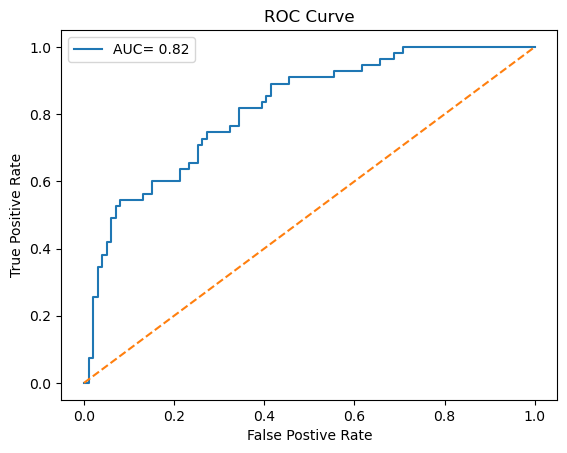

In [912]:
plt.figure()
plt.plot(fpr,tpr,label=f"AUC={auc_score: .2f}")
plt.plot([0,1],[0,1],linestyle='--')# random classifier line
plt.xlabel("False Postive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [ ]:
fdfds